* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)


* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

## Erzeuge einen DataFrame aus `student-math.csv`

In [1]:
import pandas
import pandas as pd
df = pd.read_csv('data/student-math.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Ermittle nach Geschlechtern gruppiert den durchschnittlichen Alkoholkonsum

In [2]:
df.groupby(by='sex')[["Walc", "Dalc"]].mean()

,Walc,Dalc
sex,,
F,1.956731,1.254808
M,2.663102,1.732620


## Ermittle jene 3 Features, welche am meisten mit `G3` korrelieren, abgesehen von `G1` und `G2`


In [5]:
# TODO
df.corr()['G3'][:-3].abs().sort_values(ascending=False)[:3]

failures    0.360415
Medu        0.217147
age         0.161579
Name: G3, dtype: float64

## Ermittle jene 3 Features, welche am meisten mit `Walc` korrelieren

In [6]:
df.corr()["Walc"].drop(index="Walc").abs().sort_values(ascending=False)[:3]

Dalc         0.647544
goout        0.420386
studytime    0.253785
Name: Walc, dtype: float64

## Ermittle die Absenzzahl jenes Schülers mit den meisten Absenzen, der trotzdem >= 10 G3 hat

In [60]:
df.query("G3 >= 10")["absences"].max()

54

## Ermittle, ob die Schüler mit mehr als 18 Punkten eher aus dem ruralen oder aus dem urbanen Raum kommen

In [90]:
df.query('G1 > 18 or G2 > 18 or G3 > 18').groupby(by="address").size()

address
R    1
U    6
dtype: int64

## Versuche, folgende Behauptung zu widerlegen:
"Dass die Eltern unter einem Dach leben ist sehr wichtig für eine **herausragende** Mathematiknote, immerhin leben doppelt so viele dieser Schüler mit **beiden** Eltern zusammen"

In [7]:
# TODO
groupedByPstatus = df.groupby(by="Pstatus").size()
print(groupedByPstatus[1] / groupedByPstatus[0])
groupedMoreThan19points = df.query("G1 >= 19 or G2 >= 19 or G3 >= 19").groupby(by="Pstatus").size()
print(groupedMoreThan19points[1] / groupedMoreThan19points[0])
groupedMoreThan19points

8.634146341463415
2.5


Pstatus
A    2
T    5
dtype: int64

In [123]:
pd.get_dummies(data=df, columns=['Pstatus'], drop_first=True).corr().abs()[["G1", "G2", "G3", "Pstatus_T"]]

,G1,G2,G3,Pstatus_T
age,0.064081,0.143474,0.161579,0.029598
Medu,0.205341,0.215527,0.217147,0.123565
Fedu,0.190270,0.164893,0.152457,0.088730
traveltime,0.089492,0.158030,0.126088,0.020570
studytime,0.160612,0.135880,0.097820,0.024294
failures,0.354718,0.355896,0.360415,0.003339
famrel,0.022168,0.018281,0.051363,0.025179
freetime,0.012613,0.013777,0.011307,0.038717
goout,0.149104,0.162250,0.132791,0.003459
Dalc,0.094159,0.064120,0.054660,0.030590


## Erzeuge folgende Graphik, welche die Punkte nach Adresse darstellt
![img.png](./assets/img.png)
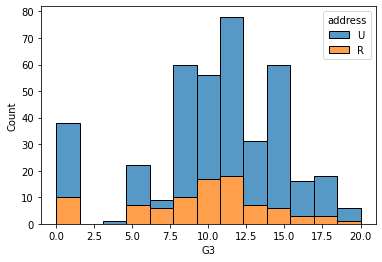

<AxesSubplot:xlabel='G3', ylabel='Count'>

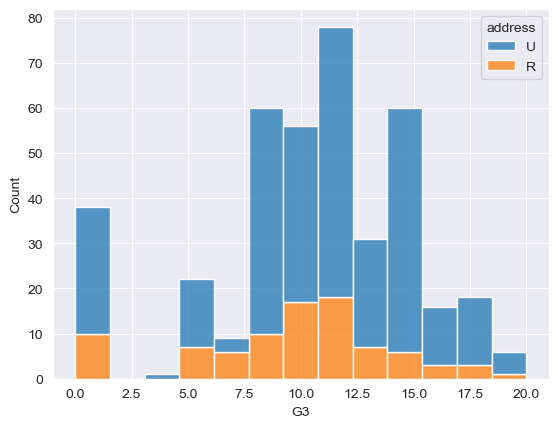

In [132]:
# TODO
import seaborn as sns
sns.histplot(data=df, x="G3", hue="address", multiple="stack")

## Ermittle die durchschnittliche Punktzahl aller Schüler, bei denen Mutter und Vater derselben Berufsgruppe angehören, gruppiert nach Berufsgruppe

In [137]:
# TODO
sameJob = df[df.Mjob == df.Fjob]
sameJob.groupby(by="Mjob")[["G3"]].mean()

,G3
Mjob,
at_home,12.285714
health,13.500000
other,9.798077
services,10.767442
teacher,13.083333


## Ersetze fehlende Werte durch den **Median** der jeweiligen `address`

In [8]:
df.isna().sum().sort_values(ascending=False)[:3]

traveltime    36
school         0
freetime       0
dtype: int64

In [9]:
filled = df.groupby(by='address')["traveltime"].apply(lambda travelTime:
                                             travelTime.fillna(travelTime.mean()))

In [18]:
filled[filled.isna()].count()

0